# Tarea 3: Mapeo en 1d

_Rodolfo Arturo González Trillo_

Paquetes que se usarán.

In [1]:
using Plots, PlotRecipes
pyplot()
using LaTeXStrings

    +(AbstractArray, 

Ahora funciones que facilitan el trabajo siguiente.
La función `mapeo1D(F, x_0, n )` basicamente hace el mapeo de la forma $F^n(x)$ como se explico en clase, siendo `n` el número de iteraciones, `x_0` el valor inicial y `F` la función que define al mapeo de la forma:
\begin{equation}
x_{n} = F (x_{n-1}).
\end{equation}

In [2]:
"""
mapeo1D(F, x_0, n)

Esta función realiza un mapeo de la función `F`, de la forma x_{n} = F (x_{n-1}), con `n` 
el número de iteraciones y x_0 el valor inicial.
"""

function mapeo1D(F, x_0, n)
    @assert n ≥ 1
    
    x = x_0
    for i in 1:n-1
        x = F(x)
    end
    
    x

end

DataArrays.DataArray

mapeo1D (generic function with 1 method)

La función `vectores_mapeo(F,x_0,n)` es la solución que encontré al problema de producir dos vectores con la forma necesaria para graficar el camino que sigue una órbita del mapeo para acercarse o alejerse de sus puntos fijos.

In [134]:
function vectores_mapeo(F,x_0,n)
    
    #Definimos un vector vx para los valores de x y vf F(x).
    
    vx = [x_0,x_0]
    vf = [x_0-rand()]    #Este valor puede ser arbitrario.
    
    
    x1 = F(x_0)  #Valor inicial a insertar dentro del vector.
    
    for i in 1:n
        push!(vx,x1,x1)
        push!(vf,x1,x1)
        x1 = F(x1) #Condición iterativa.
    end
    
    #El vector vx acaba con un elemento de sobra que debe ser eliminado.
    vx = vx[1:length(vx)-1]
    
    vx,vf
    
end

vectores_mapeo (generic function with 1 method)

En esta tarea, todos los gráficos siguen la misma estructura, por lo que se emplea esta función para ahorrar en texto y en espacio.

In [191]:
function grafico_vecmap(F::Function, x_0::Float64, N, rangox, ejesx, ejesy, titulo)
    
    vecx,vecf = vectores_mapeo(F,x_0,N)
    
    plot(rangox, F, 
    xaxis=(L"x", (ejesx[1], ejesx[2])), 
    yaxis=((ejesy[1], ejesy[2]), L"F(x)"), 
    legend=false, title = titulo, grid=false)

    plot!(rangox, x->x, color=:red) 

    plot!(vecx, vecf, 
    line=(:green, :path, 2.0, :dot), marker=( 0.5))
    
    #vecx[length(vecx)]   
    
end

grafico_vecmap (generic function with 2 methods)

**Ejercicio 1:** 

>> Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?

Ya que se tiene la función `mapeo1D` simplemente definimos la función anónimamente.

In [136]:
[mapeo1D( x -> x^2-2 ,0., n) for n in 1:15]

15-element Array{Any,1}:
  0.0
 -2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

In [137]:
[mapeo1D( x -> x^2-2 ,0.1, n) for n in 1:20]

20-element Array{Any,1}:
  0.1      
 -1.99     
  1.9601   
  1.84199  
  1.39293  
 -0.0597333
 -1.99643  
  1.98574  
  1.94317  
  1.77589  
  1.15379  
 -0.668772 
 -1.55274  
  0.411015 
 -1.83107  
  1.3528   
 -0.16992  
 -1.97113  
  1.88534  
  1.55452  

In [138]:
[mapeo1D( x -> x^2-2 ,0.001, n) for n in 1:20]

20-element Array{Any,1}:
  0.001   
 -2.0     
  2.0     
  1.99998 
  1.99994 
  1.99974 
  1.99898 
  1.99591 
  1.98364 
  1.93482 
  1.74353 
  1.03991 
 -0.918594
 -1.15618 
 -0.663237
 -1.56012 
  0.433964
 -1.81168 
  1.28217 
 -0.356043

Podemos decir que 2.0 es un punto fijo, pero que a menos que la función en algún momento valga justo x=2, de lo contrario el valor no llegará a valer 2.0.

>> **Ejercicio 2:** Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

Las funciones están hechas al principio de este documento.


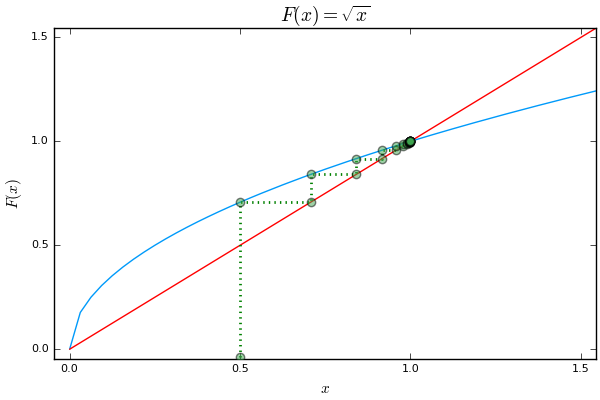

In [139]:
grafico_vecmap( 
x-> sqrt(x),          #Función.
0.5,                  #Valor inicial.
15,                   #Número de iteraciones.
0:1/32:5.2,           #Valores de x.
[0.0 , 1.5],          #Rango del eje x.
[0.0 , 1.5],          #Rango del eje y.
L"F(x)=\sqrt{x}")     #Título del gráfico.

>> **Ejercicio 3:** 

>>Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 


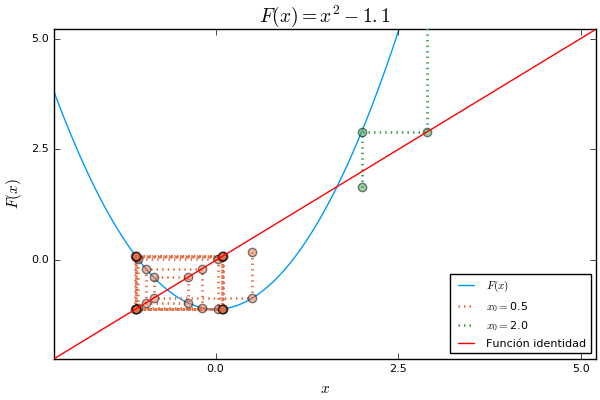

In [156]:
grafico_vecmap( 
x-> x^2-1.1,          #Función.
[0.5,2.0],                  #Valor inicial.
15,                   #Número de iteraciones.
-3:1/32:5.2,          #Valores de x.
[-2.0 , 5.0],         #Rango del eje x.
[-2.0 , 5.0],         #Rango del eje y.
L"F(x)=x^2-1.1")      #Título del gráfico.

Observamos que las órbitas se acercan a los valores alrededor 0 y -1., confirmemos esto:

In [141]:
[mapeo1D( x -> x^2-1.1 ,0, n) for n in 1:50]

50-element Array{Any,1}:
  0        
 -1.1      
  0.11     
 -1.0879   
  0.0835264
 -1.09302  
  0.0947   
 -1.09103  
  0.0903506
 -1.09184  
  0.0921075
 -1.09152  
  0.0914076
  ⋮        
  0.091608 
 -1.09161  
  0.091608 
 -1.09161  
  0.091608 
 -1.09161  
  0.091608 
 -1.09161  
  0.091608 
 -1.09161  
  0.091608 
 -1.09161  

Observamos que los valores con ese periodo, son los últimos del mapeo: 1.091608 y -1.091608

>> **Ejercicio 4:**

>>Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.


Creamos un nuevo método para cuando se tienen distintas condiciones iniciales, en forma de un `Array`.

In [188]:
function grafico_vecmap(F::Function, x_0::Array, N, rangox, ejesx, ejesy, titulo)
    
    
    #El mapeo en sí#
    plot(rangox, F,
    lab=L"F(x)",
    xaxis=(L"x", (ejesx[1], ejesx[2])), 
    yaxis=((ejesy[1], ejesy[2]), L"F(x)"), 
    legend=true, title = titulo, grid=false)
    
    puntos_fijos=Float64[]
    #Aquí es donde la función cambia, con un bucle para los distintos valores iniciales.
    for i in 1:length(x_0)
        xo = x_0[i]
        vecx,vecf = vectores_mapeo(F,x_0[i],N)   #Aquí usamos la función que hiciemos para generar los vectores.
        plot!(vecx, vecf,
        lab = L"x_0 ="*"$xo",
        line=( :path, 2.0, :dot), marker=( 0.5))
        push!(puntos_fijos,vecx[length(vecx)])
    end
    
    #Función identidad#
    plot!(rangox, x->x, lab="Función identidad", color=:red) 
    #return puntos_fijos
end

grafico_vecmap (generic function with 2 methods)

>>1. $F_1(x) = \frac{1}{3x}$.


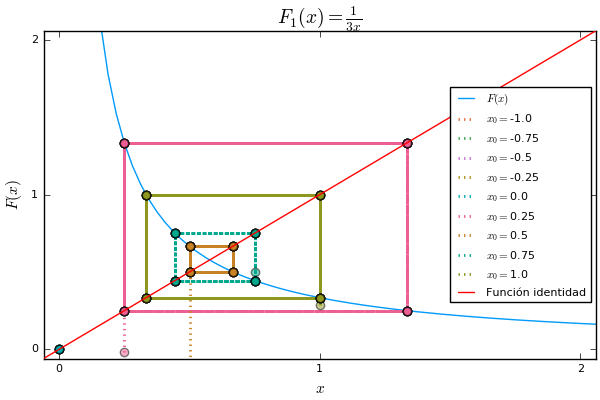

In [180]:
grafico_vecmap( 
x-> 1/(3*x) ,           #Función
collect(-1:1/4:1),      #Valores iniciales
15,                     #Número de iteraciones.
-3:1/32:5.2,            #Valores de x.
[0 , 2.0],              #Rango del eje x
[0 , 2.0],              #Rango del eje y
L"F_1(x)=\frac{1}{3x}") #Título del gráfico.

Se observa que el 0 es un punto fijo estable, dado que los puntos se mantienen periódicos alrededor de éste.

>>2. $F_2(x) = -\frac{x^5}{5}$.


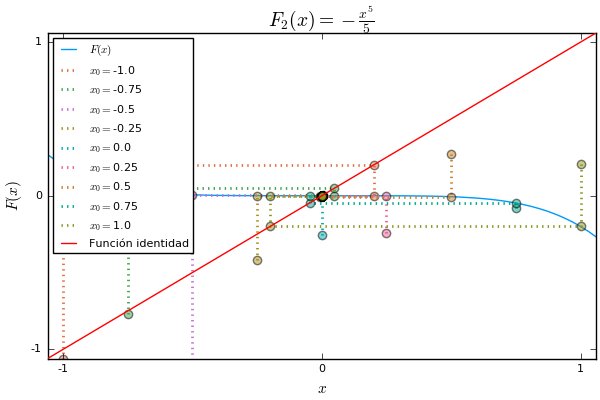

In [144]:
grafico_vecmap( 
x-> -x^5/5 ,                #Función
collect(-1:1/4:1),          #Valores iniciales
15,                         #Número de iteraciones.
-3:1/32:5.2,                #Valores de x.
[-1.0 , 1.0],               #Rango del eje x
[-1.0 , 1.0],               #Rango del eje y
L"F_2(x) = -\frac{x^5}{5}") #Título del gráfico.

Tenemos un punto fijo atractor, las órbitas tienden al 0.0.

>>3. $F_3(x) = \frac{x}{2}-2$.


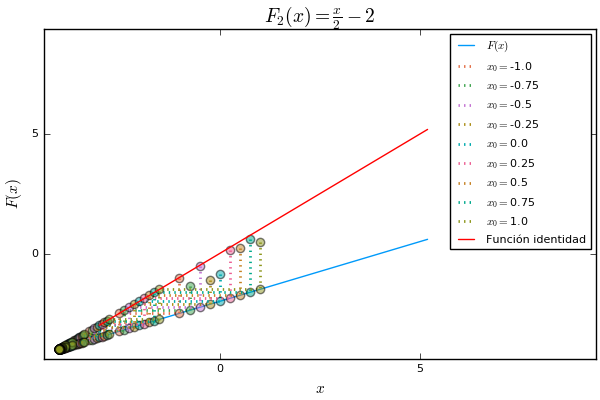

In [184]:
grafico_vecmap( 
x-> x/2-2 ,                #Función
collect(-1:1/4:1),          #Valores iniciales
15,                         #Número de iteraciones.
-3:1/32:5.2,                #Valores de x.
[-4.0 , 9.0],               #Rango del eje x
[-4.0 , 9.0],               #Rango del eje y
L"F_2(x) = \frac{x}{2}-2") #Título del gráfico.

También se trata de un punto atractor, pero ahora no está en el 0.0 si no en un punto cercano a -4.0

>> **Ejercicio 5:**

>> Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?


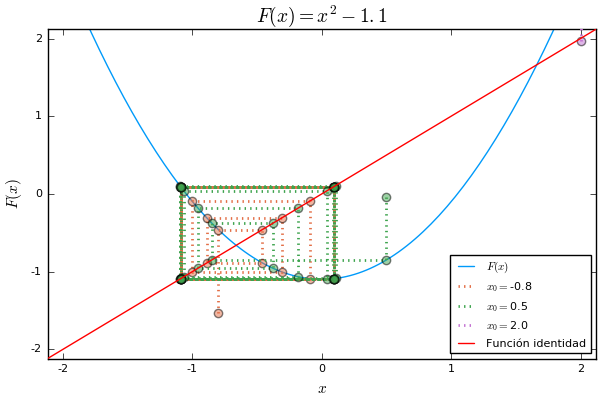

In [206]:
grafico_vecmap( 
x-> x^2-1.1,          #Función.
[-0.8,0.5,2.0],           #Valor inicial.
15,                   #Número de iteraciones.
-3:1/32:5.2,          #Valores de x.
[-2.0 , 2.0],         #Rango del eje x.
[-2.0 , 2.0],         #Rango del eje y.
L"F(x)=x^2-1.1")      #Título del gráfico.

In [201]:
valores=vectores_mapeo(x-> x^2-1.1, 0.8,1000)

([0.8,0.8,-0.46,-0.46,-0.8884,-0.8884,-0.310745,-0.310745,-1.00344,-1.00344  …  0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161],[0.169626,-0.46,-0.46,-0.8884,-0.8884,-0.310745,-0.310745,-1.00344,-1.00344,-0.0931136  …  -1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161])

In [202]:
valores=valores[2:2:length(valores)]

([0.169626,-0.46,-0.46,-0.8884,-0.8884,-0.310745,-0.310745,-1.00344,-1.00344,-0.0931136  …  -1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161],)


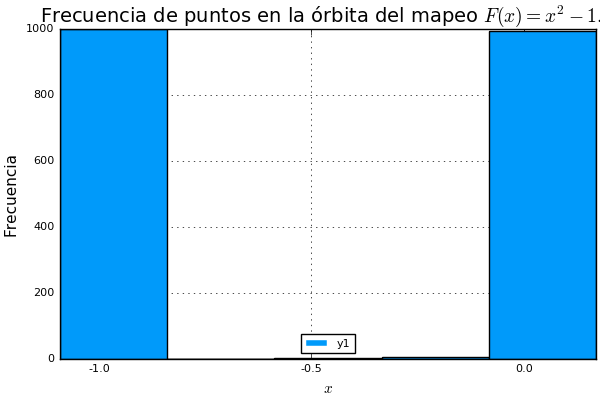

In [208]:
histogram(valores,
    nbins=5,
    xaxis=L"x",
    yaxis="Frecuencia",
    title="Frecuencia de puntos en la órbita del mapeo "*L"F(x)=x^2-1.1 ")


El mapeo converge a dos puntos periodicamente, -1.09161 y 0.09161.

**Ejercicio 6:**

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.


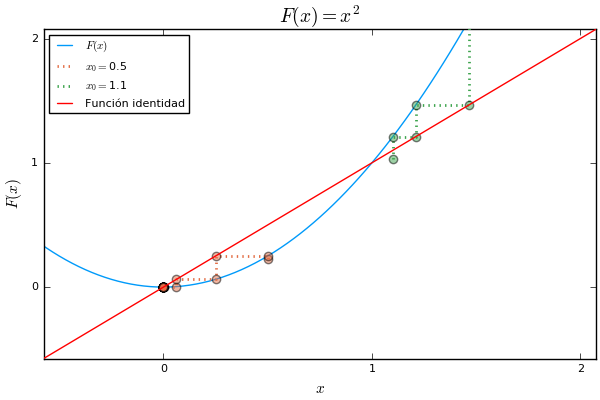

In [162]:
grafico_vecmap( 
x-> x^2 ,                   #Función
[0.5,1.1],                        #Valores iniciales
15,                         #Número de iteraciones.
-3:1/32:5.2,                #Valores de x.
[-0.5 , 2.0],               #Rango del eje x
[-0.5 , 2.0],               #Rango del eje y
L"F(x) = x^{2}")            #Título del gráfico.

Tenemos dos puntos fijos, el 0.0 que es atractivo y el 1.0 que es repulsivo.


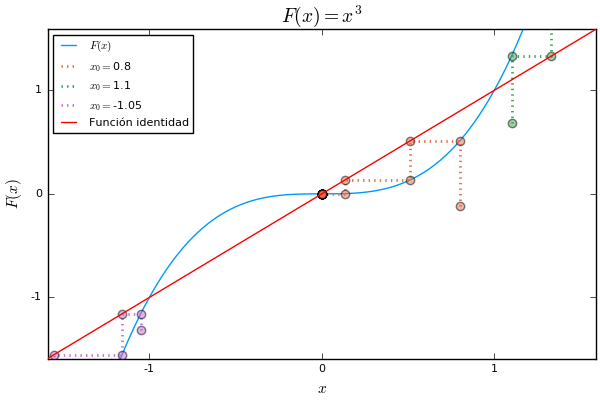

In [168]:
grafico_vecmap( 
x-> x^3 ,                   #Función
[0.8,1.1,-1.05],                  #Valores iniciales
15,                         #Número de iteraciones.
-3:1/32:5.2,                #Valores de x.
[-1.5 , 1.5],               #Rango del eje x
[-1.5 , 1.5],               #Rango del eje y
L"F(x) = x^{3}")            #Título del gráfico.

Hay tres puntos fijos, el 0 atractivo, y el -1 y 1 repulsivos.


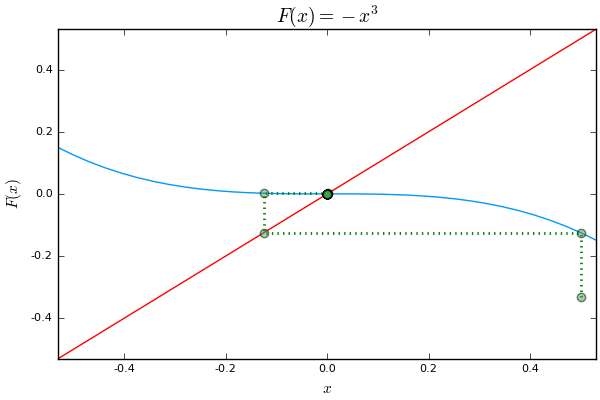

In [169]:
grafico_vecmap( 
x-> -x^3 ,                  #Función
0.5,                        #Valores iniciales
20,                         #Número de iteraciones.
-3:1/32:5.2,                #Valores de x.
[-0.5 , 0.5],               #Rango del eje x
[-0.5 , 0.5],               #Rango del eje y
L"F(x) = -x^{3}")           #Título del gráfico.

Solamente el 0. es punto fijo atractivo.

**Ejercicio 7:**

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.


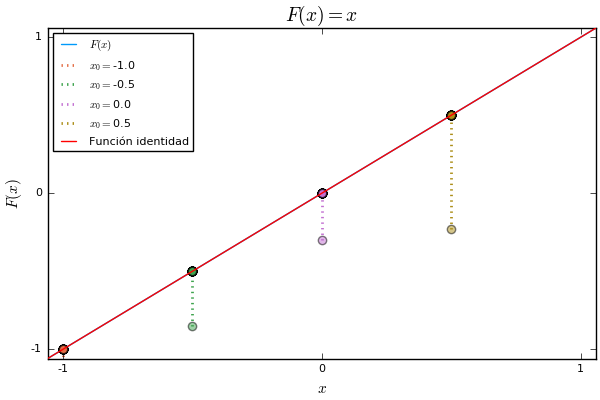

In [186]:
grafico_vecmap( 
x-> x ,               #Función
[-1.0,-0.5,0.0,0.5],                  #Valores iniciales
15,                   #Número de iteraciones.
-3:1/32:5.2,          #Valores de x.
[-1.0 , 1.0],         #Rango del eje x
[-1.0 , 1.0],         #Rango del eje y
L"F(x) = x")          #Título del gráfico.

Observamos que cualquier punto es fijo.


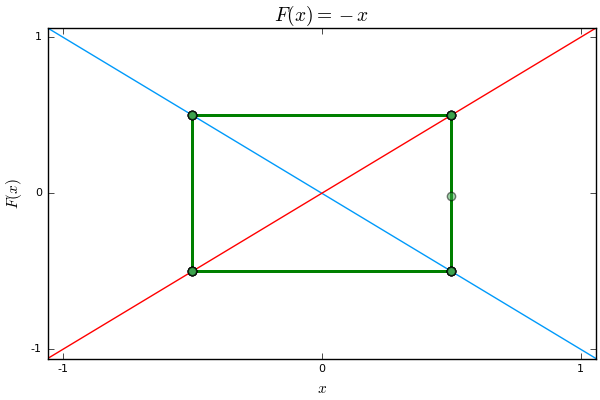

In [151]:
grafico_vecmap( 
x-> -x ,              #Función
0.5,                  #Valores iniciales
15,                   #Número de iteraciones.
-3:1/32:5.2,          #Valores de x.
[-1.0 , 1.0],         #Rango del eje x
[-1.0 , 1.0],         #Rango del eje y
L"F(x) = -x")         #Título del gráfico.

El 0.0 es un punto fijo, neutralmente atractivo.


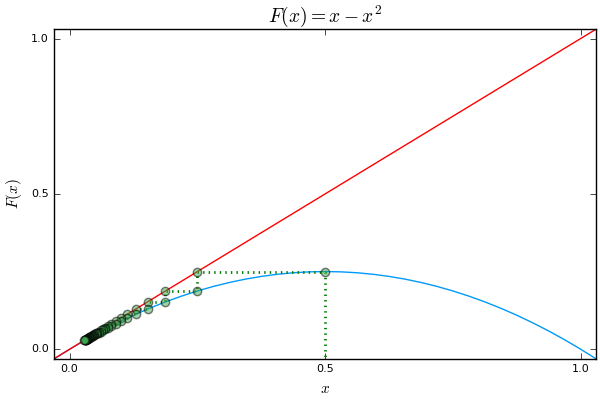

In [192]:
grafico_vecmap( 
x-> x -x^2 ,          #Función
0.5,                  #Valores iniciales
30,                   #Número de iteraciones.
-3:1/32:5.2,          #Valores de x.
[0. , 1.0],           #Rango del eje x.
[0. , 1.0],           #Rango del eje y.
L"F(x) = x -x^2")          #Título del gráfico.

Obsevamos que el 0.0 es un punto fijo atractivo, pero a cada iteración el valor se acerca más lentamente.